In [2]:
pip install numpy==1.23.5 --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
# from keras.layers.merge import concatenate, add
from keras.layers import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

from keras.utils import to_categorical
from matplotlib import pyplot

In [4]:
# Set some parameters

# im_width = 128
# im_height = 128
# border = 5

im_width = 256
im_height = 256
border = 5

# im_width = 512
# im_height = 512
# border = 5

# im_width = 1024
# im_height = 1024
# border = 5

In [5]:
root_dir = os.path.abspath("./data/salt/train/")
images_dir = os.path.abspath("./data/salt/train/images/")
masks_dir = os.path.abspath("./data/salt/train/masks/")
print(os.path.abspath(masks_dir))

C:\Users\User\data\salt\train\masks


In [6]:
ids = next(os.walk(root_dir,topdown=False))[2] # list of names all images in the given path
print("No. of images = ", len(ids))

No. of images =  4000


In [7]:
X = np.zeros((len(ids), im_height, im_width, 1), dtype=np.float32)
y = np.zeros((len(ids), im_height, im_width, 1), dtype=np.float32)

In [8]:
# img = load_img(images_dir+"4")
# print(img)

In [9]:
type(images_dir)

str

In [10]:
# # tqdm is used to display the progress bar
# for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
#     # Load images
#     img = load_img(images_dir+"\\"+id_, grayscale=True)
# #     img = load_img("images/"+id_, grayscale=True)
#     x_img = img_to_array(img)
#     x_img = resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)
#     # Load masks
#     mask = img_to_array(load_img(masks_dir+"\\"+id_, grayscale=True))
# #     mask = img_to_array(load_img("masks/"+id_, grayscale=True))
#     mask = resize(mask, (128, 128, 1), mode = 'constant', preserve_range = True)
#     # Save images
#     X[n] = x_img/255.0
#     y[n] = mask/255.0

# tqdm is used to display the progress bar
for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
    # Load images
    img = load_img(images_dir+"\\"+id_, grayscale=True)
#     img = load_img("images/"+id_, grayscale=True)
    x_img = img_to_array(img)
    x_img = resize(x_img, (256, 256, 1), mode = 'constant', preserve_range = True)
    # Load masks
    mask = img_to_array(load_img(masks_dir+"\\"+id_, grayscale=True))
#     mask = img_to_array(load_img("masks/"+id_, grayscale=True))
    mask = resize(mask, (256, 256, 1), mode = 'constant', preserve_range = True)
    # Save images
    X[n] = x_img/255.0
    y[n] = mask/255.0

# # tqdm is used to display the progress bar
# for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
#     # Load images
#     img = load_img(images_dir+"\\"+id_, grayscale=True)
# #     img = load_img("images/"+id_, grayscale=True)
#     x_img = img_to_array(img)
#     x_img = resize(x_img, (512, 512, 1), mode = 'constant', preserve_range = True)
#     # Load masks
#     mask = img_to_array(load_img(masks_dir+"\\"+id_, grayscale=True))
# #     mask = img_to_array(load_img("masks/"+id_, grayscale=True))
#     mask = resize(mask, (512, 512, 1), mode = 'constant', preserve_range = True)
#     # Save images
#     X[n] = x_img/255.0
#     y[n] = mask/255.0

# # tqdm is used to display the progress bar
# for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
#     # Load images
#     img = load_img(images_dir+"\\"+id_, grayscale=True)
# #     img = load_img("images/"+id_, grayscale=True)
#     x_img = img_to_array(img)
#     x_img = resize(x_img, (1024, 1024, 1), mode = 'constant', preserve_range = True)
#     # Load masks
#     mask = img_to_array(load_img(masks_dir+"\\"+id_, grayscale=True))
# #     mask = img_to_array(load_img("masks/"+id_, grayscale=True))
#     mask = resize(mask, (1024, 1024, 1), mode = 'constant', preserve_range = True)
#     # Save images
#     X[n] = x_img/255.0
#     y[n] = mask/255.0

C:\Users\User\AppData\Local\Temp\ipykernel_508\2066915273.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):


  0%|          | 0/4000 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\envs\gpu4\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [11]:
# Split train and valid
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=6)

Text(0.5, 1.0, 'Salt')

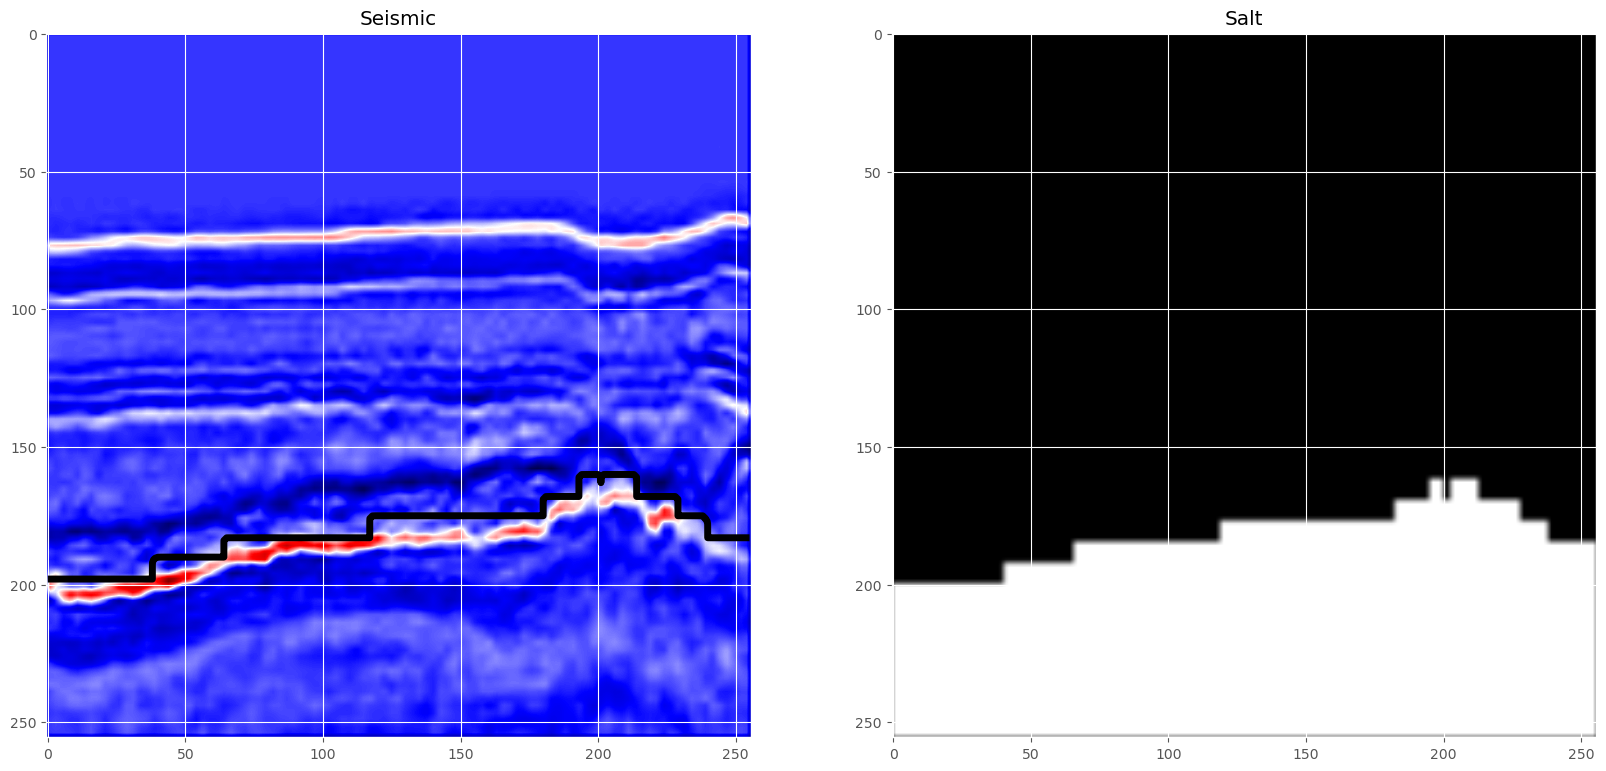

In [12]:
# Visualize any randome image along with the mask
ix = random.randint(0, len(X_train))
has_mask = y_train[ix].max() > 0 # salt indicator

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 15))

ax1.imshow(X_train[ix, ..., 0], cmap = 'seismic', interpolation = 'bilinear')
if has_mask: # if salt
    # draw a boundary(contour) in the original image separating salt and non-salt areas
    ax1.contour(y_train[ix].squeeze(), colors = 'k', linewidths = 5, levels = [0.5])
ax1.set_title('Seismic')

ax2.imshow(y_train[ix].squeeze(), cmap = 'gray', interpolation = 'bilinear')
ax2.set_title('Salt')

In [13]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [14]:
# def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True): #256*256
# def get_unet(input_img, lr, n_filters = 16, dropout = 0, batchnorm = True): #256*256
def get_unet(input_img, n_filters = 16): #256*256
    """Function to define the UNET Model"""
    # Contracting Path
    c0 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = True)
    p0 = MaxPooling2D((2, 2))(c0)
    p0 = Dropout(0)(p0)
    
    c1 = conv2d_block(p0, n_filters * 2, kernel_size = 3, batchnorm = True)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(0)(p1)
    
    c2 = conv2d_block(p1, n_filters * 4, kernel_size = 3, batchnorm = True)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(0)(p2)
    
    c3 = conv2d_block(p2, n_filters * 8, kernel_size = 3, batchnorm = True)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(0)(p3)
    
    c4 = conv2d_block(p3, n_filters * 16, kernel_size = 3, batchnorm = True)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(0)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 32, kernel_size = 3, batchnorm = True)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 16, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(0)(u6)
    c6 = conv2d_block(u6, n_filters * 16, kernel_size = 3, batchnorm = True)
    
    u7 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(0)(u7)
    c7 = conv2d_block(u7, n_filters * 8, kernel_size = 3, batchnorm = True)
    
    u8 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(0)(u8)
    c8 = conv2d_block(u8, n_filters * 4, kernel_size = 3, batchnorm = True)
    
    u9 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(0)(u9)
    c9 = conv2d_block(u9, n_filters * 2, kernel_size = 3, batchnorm = True)
    
    u10 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c9)
    u10 = concatenate([u10, c0])
    u10 = Dropout(0)(u10)
    c10 = conv2d_block(u10, n_filters * 1, kernel_size = 3, batchnorm = True)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c10)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [94]:
input_img = Input((im_height, im_width, 1), name='img')
# learning_rate_ = 0.001
epochs_ = 10
# decay_rate = learning_rate_ / epochs_

# optimizer_= tf.keras.optimizers.Adam(learning_rate=learning_rate_, use_ema=True, ema_momentum=0.9,\
#                                      ema_overwrite_frequency=1, weight_decay=decay_rate)

# model = get_unet(input_img, n_filters=16)
# model.compile(optimizer=optimizer_, loss="binary_crossentropy", metrics=["accuracy"])

In [95]:
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
    filesave = 'model-tgs-salt-'+str(learning_rates[i])
    print(filesave)

model-tgs-salt-1.0
model-tgs-salt-0.1
model-tgs-salt-0.01
model-tgs-salt-0.001
model-tgs-salt-0.0001
model-tgs-salt-1e-05
model-tgs-salt-1e-06
model-tgs-salt-1e-07


In [168]:
# learning_rates = [1E-3, 1E-5]
first = 1E-3
last = 1E-4
# last2 = 1E-5
currentLR = []
gap1 = ((1E-3)-(1E-4))/10
gap2 = ((1E-4)-(1E-5))/10
i = 0
while i<18:
    if i == 0:
        currentLR.append(first - gap)
    elif 0<i<9:
        currentLR.append(currentLR[i-1] - gap)
    elif i == 9:
        currentLR.append(last - gap2)
    else:
        currentLR.append(currentLR[i-1] - gap2)
    i = i + 1
print(len(currentLR))
print(currentLR)

18
[0.00091, 0.00082, 0.00073, 0.0006399999999999999, 0.0005499999999999999, 0.0004599999999999999, 0.0003699999999999999, 0.00027999999999999987, 0.00018999999999999987, 9.1e-05, 8.2e-05, 7.3e-05, 6.4e-05, 5.4999999999999995e-05, 4.599999999999999e-05, 3.699999999999999e-05, 2.799999999999999e-05, 1.8999999999999987e-05]


Epoch 1/10
113/113 [==============================] - ETA: 0s - loss: -24.6606 - accuracy: 0.4339
Epoch 1: saving model to model-tgs-salt-0.00091-04.h5
113/113 [==============================] - 388s 3s/step - loss: -24.6606 - accuracy: 0.4339 - val_loss: -222.9845 - val_accuracy: 2.0519e-04
Epoch 2/10
113/113 [==============================] - ETA: 0s - loss: -126.0995 - accuracy: 0.6196
Epoch 2: saving model to model-tgs-salt-0.00091-04.h5
113/113 [==============================] - 374s 3s/step - loss: -126.0995 - accuracy: 0.6196 - val_loss: -435.1523 - val_accuracy: 0.0297
Epoch 3/10
113/113 [==============================] - ETA: 0s - loss: -160.5661 - accuracy: 0.6532
Epoch 3: saving model to model-tgs-salt-0.00091-04.h5
113/113 [==============================] - 375s 3s/step - loss: -160.5661 - accuracy: 0.6532 - val_loss: -316.5131 - val_accuracy: 0.2221
Epoch 4/10
113/113 [==============================] - ETA: 0s - loss: -176.1701 - accuracy: 0.6571
Epoch 4: saving model to m

Epoch 4/10
113/113 [==============================] - ETA: 0s - loss: 34.6566 - accuracy: 0.7138
Epoch 4: saving model to model-tgs-salt-9.1e-05-04.h5
113/113 [==============================] - 518s 5s/step - loss: 34.6566 - accuracy: 0.7138 - val_loss: 28.4625 - val_accuracy: 0.6891
Epoch 5/10
113/113 [==============================] - ETA: 0s - loss: 24.0248 - accuracy: 0.6610
Epoch 5: saving model to model-tgs-salt-9.1e-05-04.h5
113/113 [==============================] - 518s 5s/step - loss: 24.0248 - accuracy: 0.6610 - val_loss: 22.2438 - val_accuracy: 0.6331
Epoch 6/10
113/113 [==============================] - ETA: 0s - loss: 14.9086 - accuracy: 0.5987
Epoch 6: saving model to model-tgs-salt-9.1e-05-04.h5
113/113 [==============================] - 514s 5s/step - loss: 14.9086 - accuracy: 0.5987 - val_loss: 14.3771 - val_accuracy: 0.5596
Epoch 7/10
113/113 [==============================] - ETA: 0s - loss: 7.2535 - accuracy: 0.5502
Epoch 7: saving model to model-tgs-salt-9.1e-05-0

Epoch 3/10
113/113 [==============================] - ETA: 0s - loss: -58.0498 - accuracy: 0.1411
Epoch 3: saving model to model-tgs-salt-6.4e-05-04.h5
113/113 [==============================] - 660s 6s/step - loss: -58.0498 - accuracy: 0.1411 - val_loss: -109.6547 - val_accuracy: 0.1010
Epoch 4/10
113/113 [==============================] - ETA: 0s - loss: -76.2666 - accuracy: 0.1635
Epoch 4: saving model to model-tgs-salt-6.4e-05-04.h5
113/113 [==============================] - 652s 6s/step - loss: -76.2666 - accuracy: 0.1635 - val_loss: -182.4240 - val_accuracy: 0.1134
Epoch 5/10
113/113 [==============================] - ETA: 0s - loss: -95.7235 - accuracy: 0.1990
Epoch 5: saving model to model-tgs-salt-6.4e-05-04.h5
113/113 [==============================] - 665s 6s/step - loss: -95.7235 - accuracy: 0.1990 - val_loss: -205.8200 - val_accuracy: 0.1603
Epoch 6/10
113/113 [==============================] - ETA: 0s - loss: -113.2619 - accuracy: 0.2398
Epoch 6: saving model to model-tgs

113/113 [==============================] - 543s 5s/step - loss: -66.7861 - accuracy: 0.3457 - val_loss: -95.3579 - val_accuracy: 0.3163
Epoch 1/10
113/113 [==============================] - ETA: 0s - loss: -5.3587 - accuracy: 0.2650
Epoch 1: saving model to model-tgs-salt-3.699999999999999e-05-04.h5
113/113 [==============================] - 598s 5s/step - loss: -5.3587 - accuracy: 0.2650 - val_loss: -2.1547 - val_accuracy: 0.2662
Epoch 2/10
113/113 [==============================] - ETA: 0s - loss: -7.2295 - accuracy: 0.2560
Epoch 2: saving model to model-tgs-salt-3.699999999999999e-05-04.h5
113/113 [==============================] - 567s 5s/step - loss: -7.2295 - accuracy: 0.2560 - val_loss: -11.9060 - val_accuracy: 0.1737
Epoch 3/10
113/113 [==============================] - ETA: 0s - loss: -9.3949 - accuracy: 0.2491
Epoch 3: saving model to model-tgs-salt-3.699999999999999e-05-04.h5
113/113 [==============================] - 552s 5s/step - loss: -9.3949 - accuracy: 0.2491 - val_los

Epoch 8/10
113/113 [==============================] - ETA: 0s - loss: -31.3430 - accuracy: 0.2482
Epoch 8: saving model to model-tgs-salt-1.8999999999999987e-05-04.h5
113/113 [==============================] - 505s 4s/step - loss: -31.3430 - accuracy: 0.2482 - val_loss: -41.0321 - val_accuracy: 0.2286
Epoch 9/10
113/113 [==============================] - ETA: 0s - loss: -34.1194 - accuracy: 0.2486
Epoch 9: saving model to model-tgs-salt-1.8999999999999987e-05-04.h5
113/113 [==============================] - 506s 4s/step - loss: -34.1194 - accuracy: 0.2486 - val_loss: -45.1077 - val_accuracy: 0.2283
Epoch 10/10
113/113 [==============================] - ETA: 0s - loss: -36.6392 - accuracy: 0.2502
Epoch 10: saving model to model-tgs-salt-1.8999999999999987e-05-04.h5
113/113 [==============================] - 498s 4s/step - loss: -36.6392 - accuracy: 0.2502 - val_loss: -49.4444 - val_accuracy: 0.2285


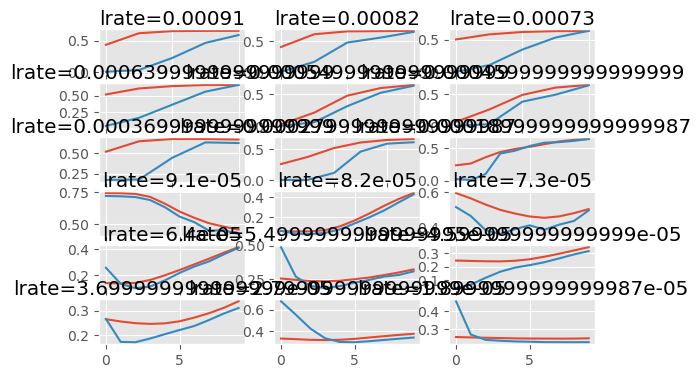

In [169]:
# callbacks_ = [
#     EarlyStopping(patience=5, verbose=1),
#     ModelCheckpoint('model-tgs-salt.h5', verbose=1, save_best_only=False, save_weights_only=True)
# ]

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate, epochs_, callbacks_):
    decay_rate = lrate / epochs_
    # define model
    # compile model
    optimizer_= tf.keras.optimizers.Adam(learning_rate=lrate, use_ema=True, ema_momentum=0.95, \
                                         ema_overwrite_frequency=1, weight_decay=decay_rate)
#     optimizer_= tf.keras.optimizers.Adam(learning_rate=lrate, weight_decay=decay_rate)
    model = get_unet(input_img, n_filters=16)
    model.compile(optimizer=optimizer_, loss="binary_crossentropy", metrics=["accuracy"])
    # fit model
    history = model.fit(trainX, trainy, batch_size=32, epochs=epochs_, callbacks=callbacks_, validation_data=(testX, testy))
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('lrate='+str(lrate), pad=-50)

# create learning curves for different learning rates
#เขียนโปรแกรมเซฟไฟล์หลายไฟล์ของ callback เซฟทีละ epoch
# learning_rates = [1E-6, 1E-7]
for i in range(len(currentLR)):
    filesaved = 'model-tgs-salt-'+str(currentLR[i])+'-04.h5'
    callbacks_ = [EarlyStopping(patience=3, verbose=1),
                  ModelCheckpoint(filesaved, 
                                  verbose=1, save_best_only=False, 
                                  save_weights_only=True)]
    # determine the plot number
#     plot_no = 430 + (i+1)
#     pyplot.subplot(plot_no)
    plot_no = i+1
    pyplot.subplot(7,3,plot_no)
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_valid, y_valid, currentLR[i], epochs_, callbacks_)
# show learning curves
pyplot.show()

In [193]:
# decay_rate = lrate / epochs_
# optimizer_= tf.keras.optimizers.Adam()
# optimizer_= tf.keras.optimizers.Adam(learning_rate=1e-05, weight_decay=decay_rate)
# optimizer_= tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer_= tf.keras.optimizers.Adam(learning_rate=0.00018999999999999987, use_ema=True, ema_momentum=0.95, \
                                         ema_overwrite_frequency=1)
model = get_unet(input_img, n_filters=16)
model.compile(optimizer=optimizer_, loss="binary_crossentropy", metrics=["accuracy"])
model.load_weights('model-tgs-salt-0.00018999999999999987-04.h5')

In [195]:
# Evaluate on validation set (this must be equals to the best log_loss)
model.evaluate(X_valid, y_valid, verbose=1)

13/13 [==============================] - 19s 1s/step - loss: -188.5325 - accuracy: 0.6403


[-188.53245544433594, 0.6402919888496399]

In [196]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_valid, verbose=1)

13/13 [==============================] - 18s 1s/step


In [197]:
# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [198]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Seismic')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Salt')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Salt Predicted')
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Salt Predicted binary');

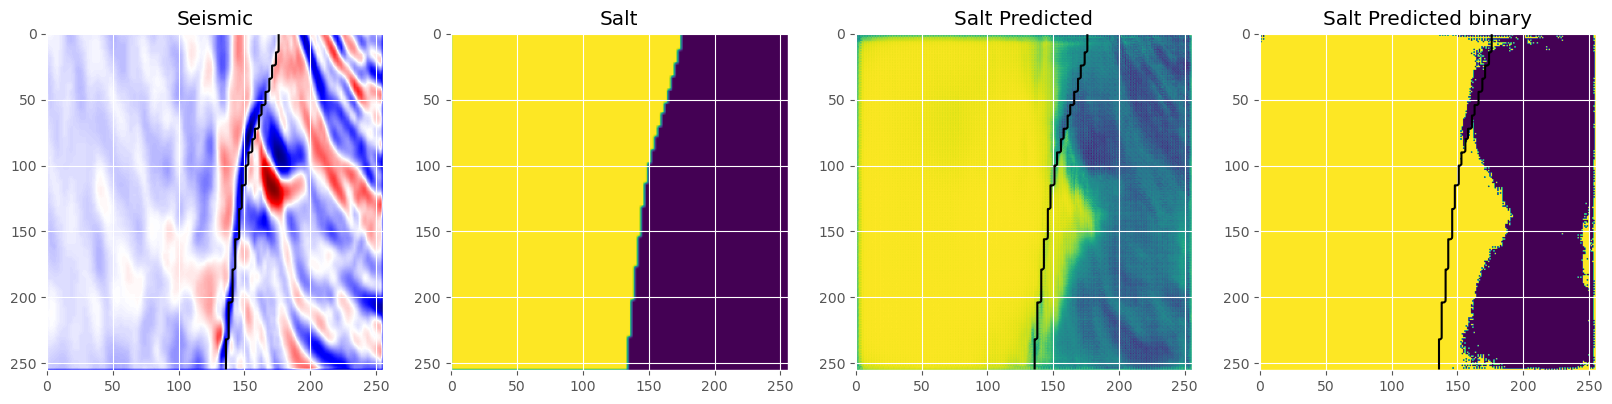

In [199]:
# Check if training data looks all right
plot_sample(X_train, y_train, preds_train, preds_train_t, ix=14)

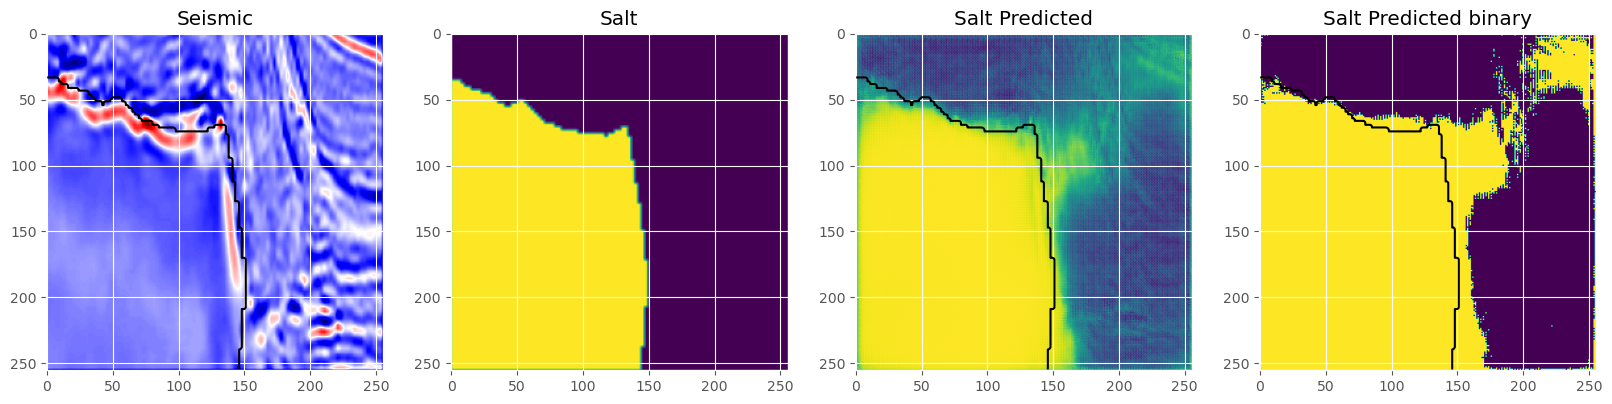

In [200]:
plot_sample(X_train, y_train, preds_train, preds_train_t)

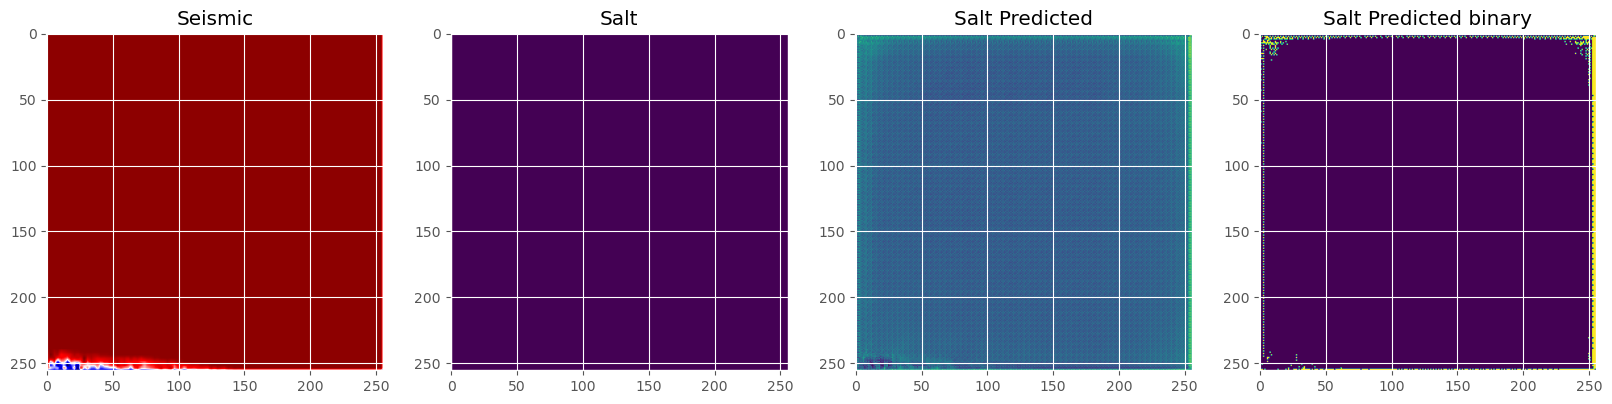

In [201]:
# Check if valid data looks all right
plot_sample(X_valid, y_valid, preds_val, preds_val_t, ix=19)

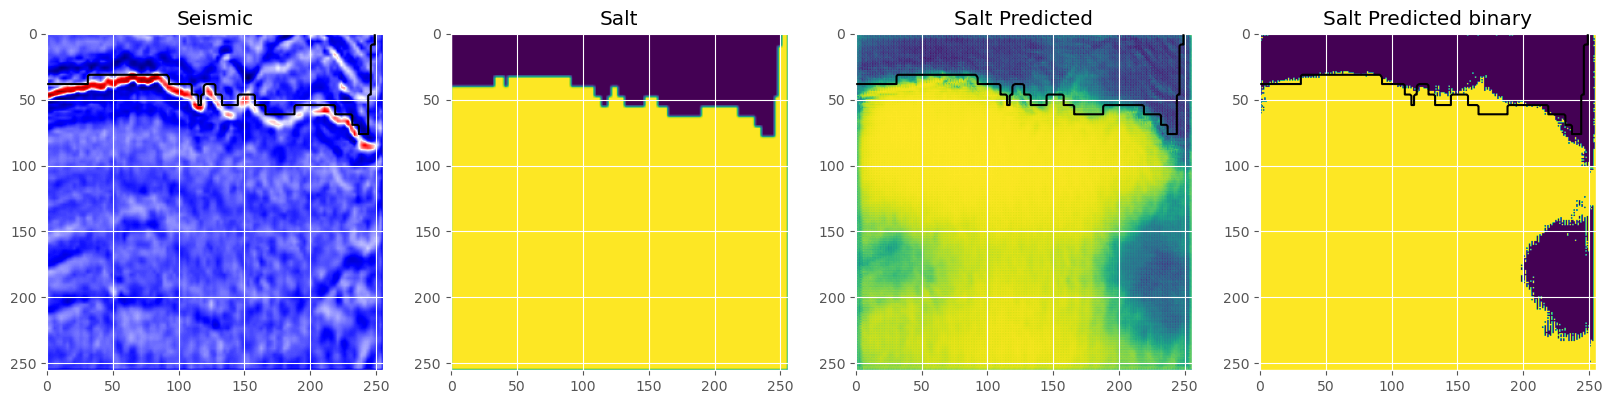

In [206]:
plot_sample(X_valid, y_valid, preds_val, preds_val_t)

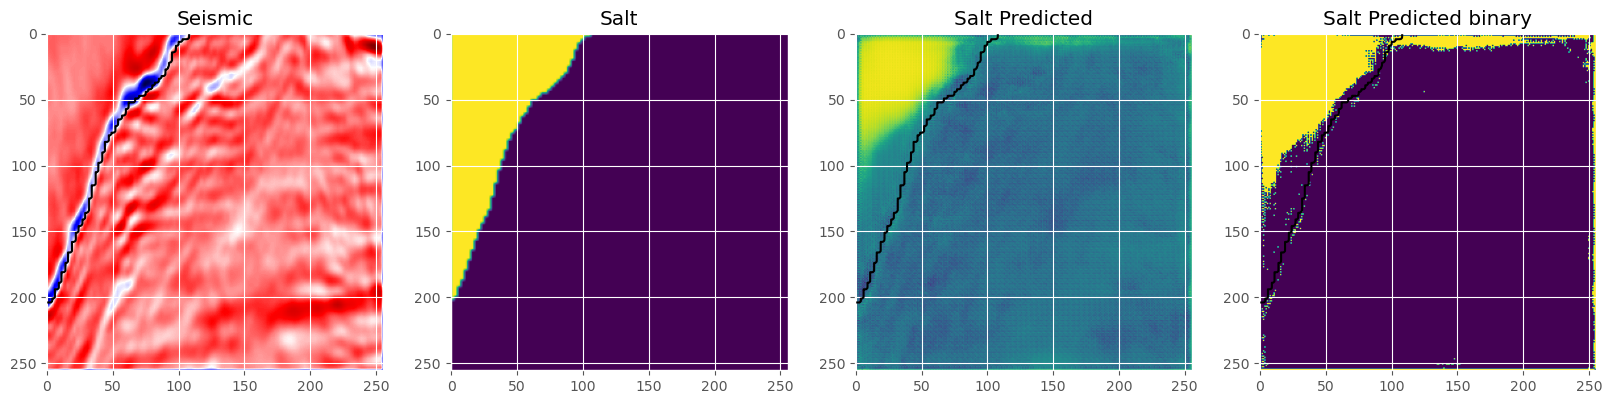

In [204]:
plot_sample(X_valid, y_valid, preds_val, preds_val_t)

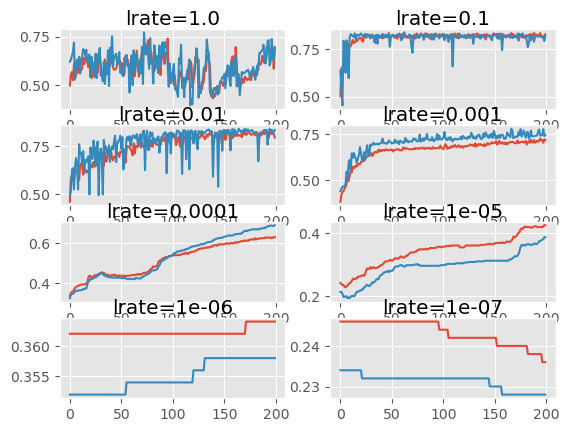

In [56]:
# # study of learning rate on accuracy for blobs problem
# from sklearn.datasets import make_blobs
# from keras.layers import Dense
# from keras.models import Sequential
# from keras.optimizers import SGD
# from keras.utils import to_categorical
# from matplotlib import pyplot

# # prepare train and test dataset
# def prepare_data():
# 	# generate 2d classification dataset
# 	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# 	# one hot encode output variable
# 	y = to_categorical(y)
# 	# split into train and test
# 	n_train = 500
# 	trainX, testX = X[:n_train, :], X[n_train:, :]
# 	trainy, testy = y[:n_train], y[n_train:]
# 	return trainX, trainy, testX, testy

# # fit a model and plot learning curve
# def fit_model(trainX, trainy, testX, testy, lrate):
# 	# define model
# 	model = Sequential()
# 	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
# 	model.add(Dense(3, activation='softmax'))
# 	# compile model
# 	opt = SGD(lr=lrate)
# 	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# 	# fit model
# 	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# 	# plot learning curves
# 	pyplot.plot(history.history['accuracy'], label='train')
# 	pyplot.plot(history.history['val_accuracy'], label='test')
# 	pyplot.title('lrate='+str(lrate), pad=-50)

# # prepare dataset
# trainX, trainy, testX, testy = prepare_data()
# # create learning curves for different learning rates
# learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
# for i in range(len(learning_rates)):
# 	# determine the plot number
# 	plot_no = 420 + (i+1)
# 	pyplot.subplot(plot_no)
# 	# fit model and plot learning curves for a learning rate
# 	fit_model(trainX, trainy, testX, testy, learning_rates[i])
# # show learning curves
# pyplot.show()